# **Distance Predictor Part 2**
Author: Declan Costello

Date: 8/6/2023

## **Part 2 Description**

Here I created features and then further explored these new trends

## **Table of Context**

1. [Installation](#Installation)
2. [Inspecting Data](#Inspecting-Data)
3. [Cleaning Data](#Cleaning-Data)
4. [Feature Engineering](#Feature-Engineering)
5. [Feature Explortion](#Feature-Explortion)
6. [Future Analysis](#Future-Analysis)

# **Installation**

The following installs the necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

## **Inspecting Data**

In [2]:
data = pd.read_csv('pybaseball_2022.csv')
data = data[data['hit_distance_sc'].notna()]

In [3]:
data = data[data['events'].isin(["field_out", "single", "double",  "triple", "home_run"])]

data = data[['hit_distance_sc','launch_angle','launch_speed', "hc_x", "hc_y", "release_speed", "events", "home_team", "pitch_type", "stand", "p_throws", "woba_value"]]

In [4]:
print(data.shape)

data.isnull().sum().sort_values(ascending=False)

(116316, 12)


launch_speed       112
hc_x                38
hc_y                38
release_speed        7
launch_angle         2
hit_distance_sc      0
events               0
home_team            0
pitch_type           0
stand                0
p_throws             0
woba_value           0
dtype: int64

## **Cleaning Data**

In [5]:
data = data[data['hc_x'].notna()]
data = data[data['hc_y'].notna()]
data = data[data['launch_angle'].notna()]
data = data[data['launch_speed'].notna()]
data = data[data['release_speed'].notna()]

# **Feature Engineering**
The following is a list of the important features I created for future models:

*   [**Platoon Splits**](#Platoon-Splits) - In baseball, launch angle is the vertical angle at which the ball leaves the player's bat after being struck. It's measured in relation to the ground. A high launch angle means the ball will go further and higher into the air, and a low launch angle means the ball will go lower and not as far. 

*   [**Pitch Type**](#Pitch-Type) - In Major League Baseball (MLB), a pitch type is a classification of a pitch based on its speed, movement, and trajectory. There are many different pitch types, each with its own unique characteristics.

*   [**Dome**](#Dome) - A domed stadium is a stadium with a roof that covers the entire playing field and stands. This type of stadium is designed to protect fans from the elements, such as rain, snow, and extreme heat. 

*   [**Elevation**](#Elevation) - Elevation is a distance measurement, usually in the vertical or "up" direction, between a reference datum and sea level.

*   [**Spray**](#Spray) - The term "spray" refers to where a batter hits the ball on the field. A "spray hitter" is a batter who has a relatively even distribution of batted balls to all three fields.

*   [**Pull**](#pull-percent) - “Pulling” a ball means to hit it sharply along the line from the side of the plate you stand on. If you are a right-handed hitter, pulling a pitch means you have hit it toward the third-base line, either fair or foul.

*   [**Pop**](#pop-speed) - Exit Velo - Release Speead, Is the ball popping off the bat faster than the pitcher is throwing it? Because of the lack of data in this data set, This stat is an attempt to measure quality contact.

*   [**Barrel**](#Barrel) - In MLB, the term "barrel" refers to a batted ball that is hit with a combination of high exit velocity and optimal launch angle. Barrels are more likely to produce hits, particularly extra-base hits, than non-barrels.

        To be classified as a barrel, a batted ball must meet the following criteria:

    - Exit velocity of at least 98 miles per hour
    - Launch angle of between 26 and 30 degrees

# **Platoon Splits**

 - 0 --> bad batting matchup
 - 1 --> good batting matchup

In [6]:
data['fav_platoon_split_for_batter'] = np.where(data['stand']!= data['p_throws'], 1, 0)


# **Pitch Type**

 - 0 --> fastball
 - 1 --> breaking
 - 2 --> offspeed

In [7]:
pitch_type_grouped = {
    'FF':0,
    'SI':0,
    'SL':1,
    'CH':2,
    'FC':0,
    'CU':1,
    'ST':1,
    'KC':1, #knuckle curve a breaking ball, not offspeed right?
    'FS':2,
    'SV':1,
    'FA':0,
    'EP':2,
    'CS':1,#spiked curve?
    'KN':2 #knuckle ball is def off speed right?
}

data['grouped_pitch_type'] = data['pitch_type'].map(pitch_type_grouped)

# **Dome**

- 0 --> no roof
- 1 --> roof

In [8]:
Domed_Stadiums = {
    'COL':0,
    'PHI':0,
    'AZ':1,
    'TOR':1,
    'STL':0,
    'NYY':0,
    'CLE':0,
    'KC':0,
    'PIT':0,
    'MIN':0,
    'DET':0,
    'WSH':0,
    'CWS':0,
    'NYM':0,
    'BOS':0,
    'BAL':0,
    'MIA':1,
    'OAK':0,
    'HOU':1,
    'SD':0,
    'LAD':0,
    'TEX':1,
    'SEA':1,
    'LAA':0,
    'CIN':0,
    'CHC':0,
    'TB':1,
    'SF':0,
    'ATL':0,
    'MIL':1
}

data['domed'] = data['home_team'].map(Domed_Stadiums)

# **Elevation**

- stadium --> ft in elevation

In [9]:
Stadium_elevation = {
    'COL':5183,
    'PHI':9,
    'AZ':1082,
    'TOR':247,
    'STL':455,
    'NYY':54,
    'CLE':582,
    'KC':750,
    'PIT':743,
    'MIN':812,
    'DET':596,
    'WSH':25,
    'CWS':596,
    'NYM':54,
    'BOS':20,
    'BAL':130,
    'MIA':15,
    'OAK':42,
    'HOU':38,
    'SD':13,
    'LAD':267,
    'TEX':616,
    'SEA':10,
    'LAA':160,
    'CIN':683,
    'CHC':596,
    'TB':44,
    'SF':63,
    'ATL':1050,
    'MIL':593
}

data['game_elevation'] = data['home_team'].map(Stadium_elevation)

# **Spray**

In [10]:
data["spray_angle"] = np.arctan((data["hc_x"]-125.42)/(198.27-data["hc_y"]))*180/np.pi*.75

# **Barrel**

In [11]:
data["is_barrel"] = data.apply(lambda x: 1 if ((x.launch_angle <= 30) and (x.launch_angle >= 26) and (x.launch_speed >= 98)) else 0, axis = 1)

# **Pop Speed**

In [12]:
data["Pop"] = data["launch_speed"]-data["release_speed"]

# **Pull Percent**

In [13]:
#                                        if a lefty,                                                           lefty pull equation, righty pull equation
data['pull_percent'] = np.where(data['stand']== 'L', (data['spray_angle']+67.46509193730111)/(67.33640243518595+67.46509193730111), (abs(data['spray_angle']-67.48324031495474))/ (67.5 +67.48324031495474))

# **Pop Percentile**

In [14]:
data['Pop_percentile'] = data['Pop'].rank(pct=True)

# **Distance Percentile**

In [15]:
data['hit_distance_sc_percentile'] = data['hit_distance_sc'].rank(pct=True)

# **Launch Speed Percentile**

In [16]:
data['launch_speed_percentile'] = data['launch_speed'].rank(pct=True)

# **Release Speed Percentile**

In [17]:
data['release_speed_percentile'] = data['release_speed'].rank(pct=True)

# **Feature Exploration**

*   [**Righty Batter Spray vs Woba & Events**](#righty-batter-spray-vs-woba--events)

*   [**Dynamic Distance Pull Rate**](#dynamic-distance-pull-rate)

*   [**Dynamic Distance Launch Angle Rate**](#dynamic-distance-la-rate)

*   [**Dynamic Distance Pop Rate**](#dynamic-pop-release-speed-rate)

*   [**Pop Spray**](#pop-spray)

*   [**Barrel Spray**](#barrel-spray)

*   [**LA vs Pull% Sum Heat Maps**](#sum-heatmap-la-vs-pull-for-distance-woba-and-pop)
    - Distance
    - Woba
    - Pop
    

*   [**LA vs Pull% Mean Heat Maps**](#mean-heatmap-la-vs-pull-for-distance-woba-and-pop)
    - Distance
    - Woba
    - Pop

# **DF Set Up**

In [18]:
# Righty BBs

Righty_data = data[data['stand'].isin(["R"])]

#Top Distance

Top_25_hit_distance_sc_percentile = data.loc[data['hit_distance_sc_percentile'] > 0.74]

Righty_Top_25_hit_distance_sc_percentile = Top_25_hit_distance_sc_percentile[Top_25_hit_distance_sc_percentile['stand'].isin(["R"])]

# Top EV

Top_25_launch_speed_percentile = data.loc[data['launch_speed_percentile'] > 0.74]

Righty_Top_25_launch_speed_percentile = Top_25_launch_speed_percentile[Top_25_launch_speed_percentile['stand'].isin(["R"])]

#Top Pops

Top_25_launch_Pop_percentile = data.loc[data['Pop_percentile'] > 0.74]

Righty_Top_25_launch_Pop_percentile = Top_25_launch_Pop_percentile[Top_25_launch_Pop_percentile['stand'].isin(["R"])]

#Top Release Speed

Top_95_launch_release_speed_percentile = data.loc[data['release_speed_percentile'] > 0.05]

Righty_batter_Top_95_launch_release_speed_percentile = Top_95_launch_release_speed_percentile[Top_95_launch_release_speed_percentile['stand'].isin(["R"])]


# **Righty Batter Spray vs Woba & Events**

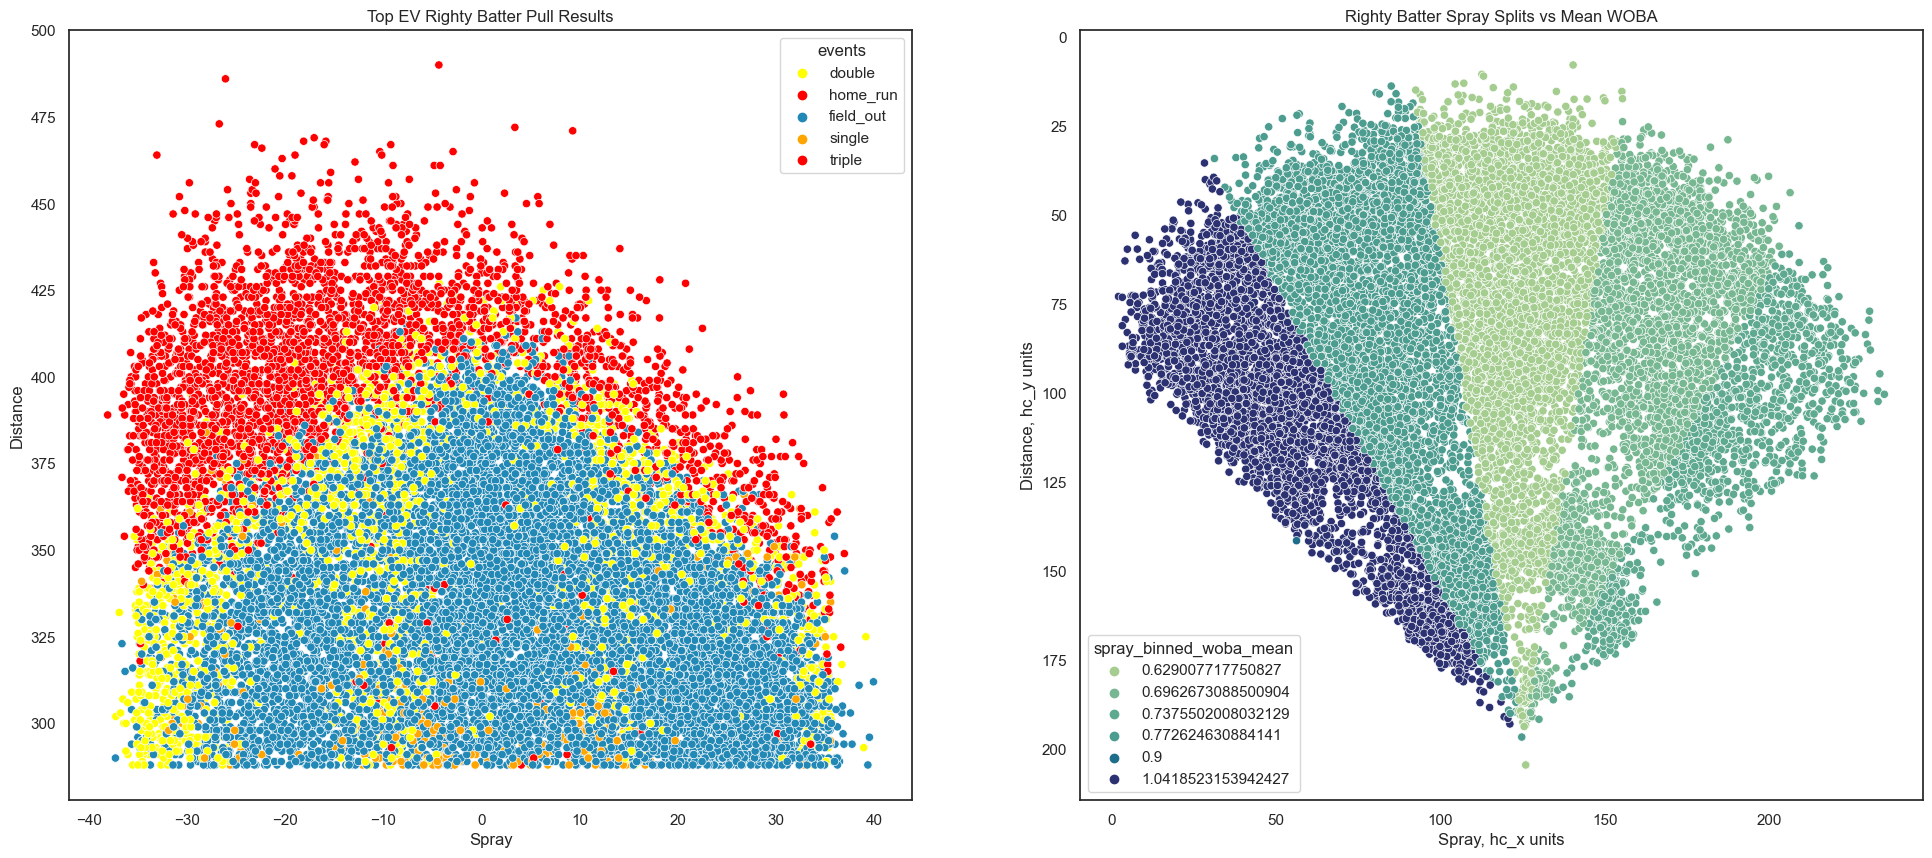

In [19]:
#----------- Top EV Righty Pull Results ----------------------

#limit spray
Righty_Top_25_hit_distance_sc_percentile_limited_spray = Righty_Top_25_hit_distance_sc_percentile.loc[Righty_Top_25_hit_distance_sc_percentile['spray_angle'] < 40]
Righty_Top_25_hit_distance_sc_percentile_limited_spray = Righty_Top_25_hit_distance_sc_percentile_limited_spray.loc[Righty_Top_25_hit_distance_sc_percentile_limited_spray['spray_angle'] > -40]

#----------- Righty Batter Spray Splits vs Mean WOBA ----------------------

#limit spray
Righty_Top_25_launch_speed_percentile_limited_spray = Righty_Top_25_launch_speed_percentile.loc[Righty_Top_25_launch_speed_percentile['spray_angle'] < 38]
Righty_Top_25_launch_speed_percentile_limited_spray = Righty_Top_25_launch_speed_percentile_limited_spray.loc[Righty_Top_25_launch_speed_percentile_limited_spray['spray_angle'] > -38]

bins = np.linspace(Righty_Top_25_launch_speed_percentile_limited_spray['spray_angle'].min(),Righty_Top_25_launch_speed_percentile_limited_spray['spray_angle'].max(),6)

Righty_Top_25_launch_speed_percentile_limited_spray['spray_angle_binned'] = pd.cut(Righty_Top_25_launch_speed_percentile_limited_spray['spray_angle'], bins)

Righty_Top_25_launch_speed_percentile_limited_spray['spray_angle_binned'] = Righty_Top_25_launch_speed_percentile_limited_spray['spray_angle_binned'].astype(str)

pull_woba = Righty_Top_25_launch_speed_percentile_limited_spray.groupby('spray_angle_binned')['woba_value'].mean()

righty_spray_binned_woba = pull_woba.to_dict()

Righty_Top_25_launch_speed_percentile_limited_spray['spray_binned_woba_mean'] = Righty_Top_25_launch_speed_percentile_limited_spray['spray_angle_binned'].map(righty_spray_binned_woba)

Righty_Top_25_launch_speed_percentile_limited_spray['launch_speed_percentile'] = Righty_Top_25_launch_speed_percentile_limited_spray['launch_speed'].rank(pct=True)

#------------------- Graph --------------------------

plt.figure(figsize=(50,10))
sns.set_theme(style="white")


plt.subplot(142)
ax = sns.scatterplot(data = Righty_Top_25_hit_distance_sc_percentile_limited_spray, 
                x=Righty_Top_25_hit_distance_sc_percentile_limited_spray.spray_angle, 
                y=Righty_Top_25_hit_distance_sc_percentile_limited_spray.hit_distance_sc, 
                hue = Righty_Top_25_hit_distance_sc_percentile_limited_spray.events, 
                palette=dict(home_run ='red',
                             triple= 'red', 
                             field_out = '#2288b6', 
                             single = 'orange',
                             double='yellow'))

ax.set(xlabel='Spray')
ax.set(ylabel='Distance')

plt.title('Top EV Righty Batter Pull Results')

plt.subplot(143)
ax = sns.scatterplot(data = Righty_Top_25_launch_speed_percentile_limited_spray, 
                     x=Righty_Top_25_launch_speed_percentile_limited_spray.hc_x, 
                     y=Righty_Top_25_launch_speed_percentile_limited_spray.hc_y, 
                     hue = Righty_Top_25_launch_speed_percentile_limited_spray.spray_binned_woba_mean, palette='crest')
ax.invert_yaxis()
ax.set(xlabel='Spray, hc_x units')
ax.set(ylabel='Distance, hc_y units')
plt.title('Righty Batter Spray Splits vs Mean WOBA')

plt.show()

# **Dynamic Distance Pull Rate**

Text(0.5, 1.0, 'Top EV, Binned P% vs Mean Distance')

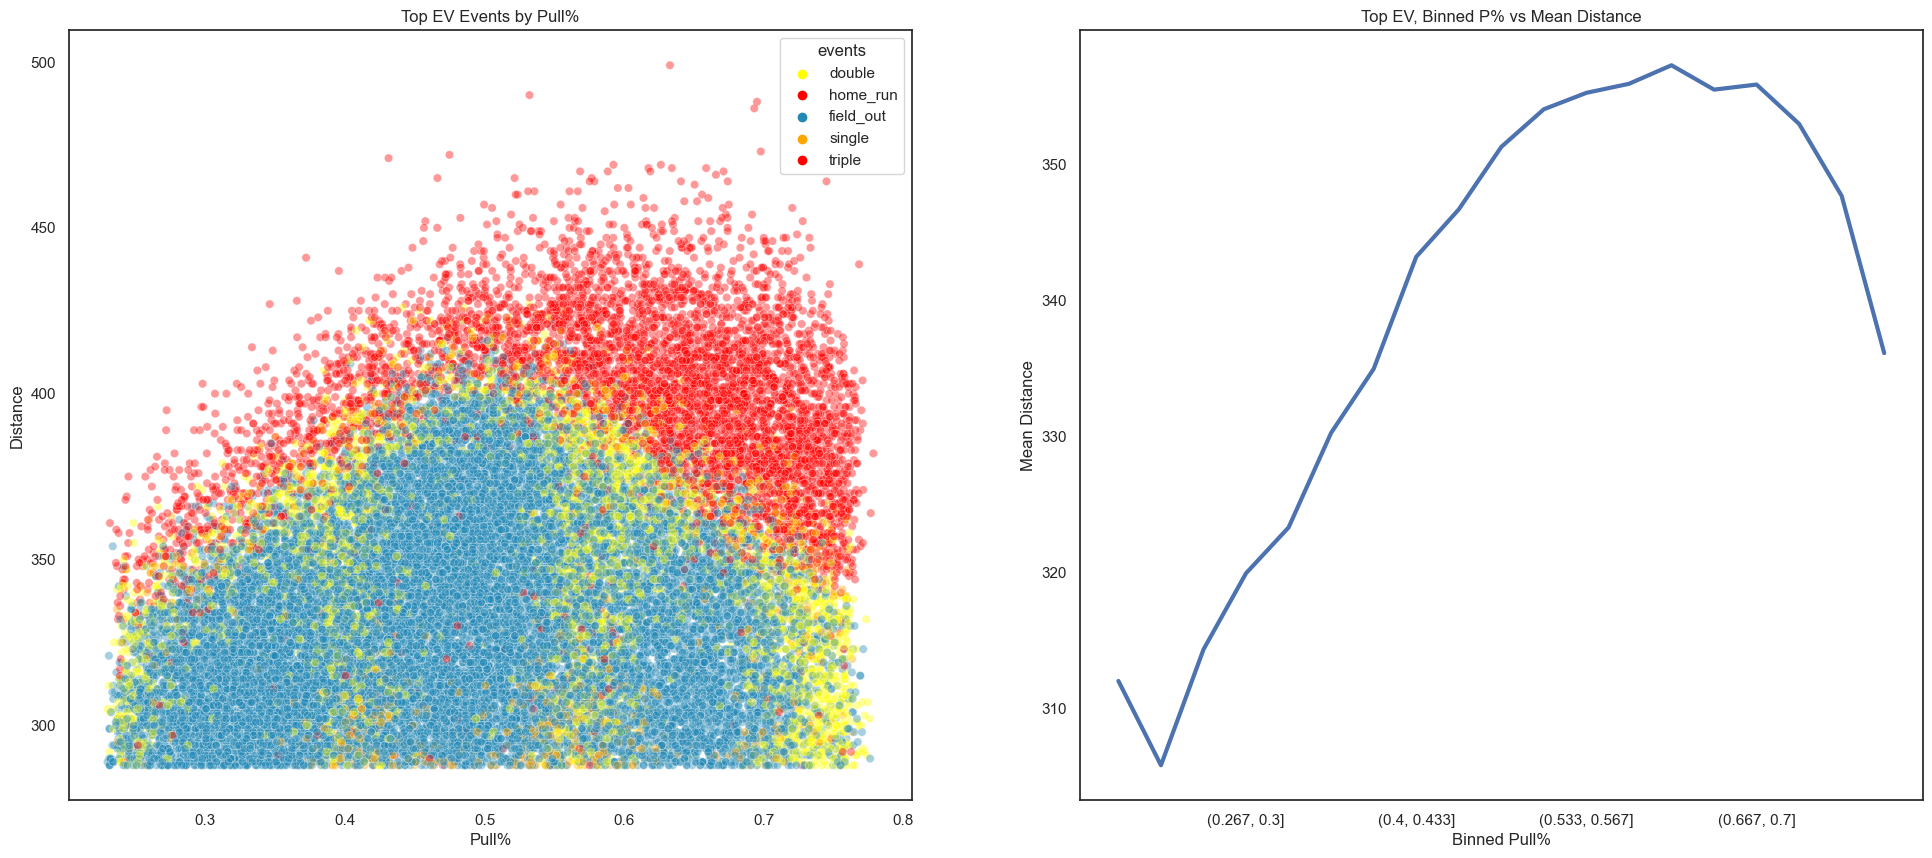

In [20]:
#----------- Limit Pull% ----------------------


Top_25_hit_distance_sc_percentile_limited_pull_percent = Top_25_hit_distance_sc_percentile.loc[Top_25_hit_distance_sc_percentile['pull_percent'] < .78]
Top_25_hit_distance_sc_percentile_limited_pull_percent = Top_25_hit_distance_sc_percentile_limited_pull_percent.loc[Top_25_hit_distance_sc_percentile_limited_pull_percent['pull_percent'] > .23]


#----------- Top EV Mean Distance by Pull% ----------------------

bins = np.linspace(0,1,31)
Top_25_hit_distance_sc_percentile['pull_percent_binned'] = pd.cut(Top_25_hit_distance_sc_percentile['pull_percent'], bins)
pull_percent_binned_mean_hit_distance_sc = Top_25_hit_distance_sc_percentile.groupby('pull_percent_binned')['hit_distance_sc'].mean()

# create new df and reindex
pull_percent_binned_mean_hit_distance_sc = pd.DataFrame(pull_percent_binned_mean_hit_distance_sc)
pull_percent_binned_mean_hit_distance_sc = pull_percent_binned_mean_hit_distance_sc.reset_index()

#chop to make nice viz
pull_percent_binned_mean_hit_distance_sc = pull_percent_binned_mean_hit_distance_sc.iloc[5:24,:]

#------------------- Graph --------------------------

plt.figure(figsize=(50,10))
sns.set_theme(style="white")


plt.subplot(142)
chart = sns.scatterplot(data = Top_25_hit_distance_sc_percentile_limited_pull_percent, 
                        x=Top_25_hit_distance_sc_percentile_limited_pull_percent.pull_percent, 
                        y=Top_25_hit_distance_sc_percentile_limited_pull_percent.hit_distance_sc, 
                        hue = Top_25_hit_distance_sc_percentile_limited_pull_percent.events, 
                        alpha = 0.4, 
                        palette=dict(home_run ='red',
                                     triple= 'red', 
                                     field_out = '#2288b6', 
                                     single = 'orange',double='yellow'))
chart.set(xlabel='Pull%')
chart.set(ylabel='Distance')
plt.title('Top EV Events by Pull%')

plt.subplot(143)
chart = sns.lineplot(data=pull_percent_binned_mean_hit_distance_sc, 
                     x=pull_percent_binned_mean_hit_distance_sc.pull_percent_binned.astype(str), 
                     y=pull_percent_binned_mean_hit_distance_sc.hit_distance_sc, 
                     linewidth = 3)
chart.set(xticks=[3,7,11,15])
chart.set(xlabel='Binned Pull%')
chart.set(ylabel='Mean Distance')
plt.title('Top EV, Binned P% vs Mean Distance')


# **Dynamic Distance LA Rate**

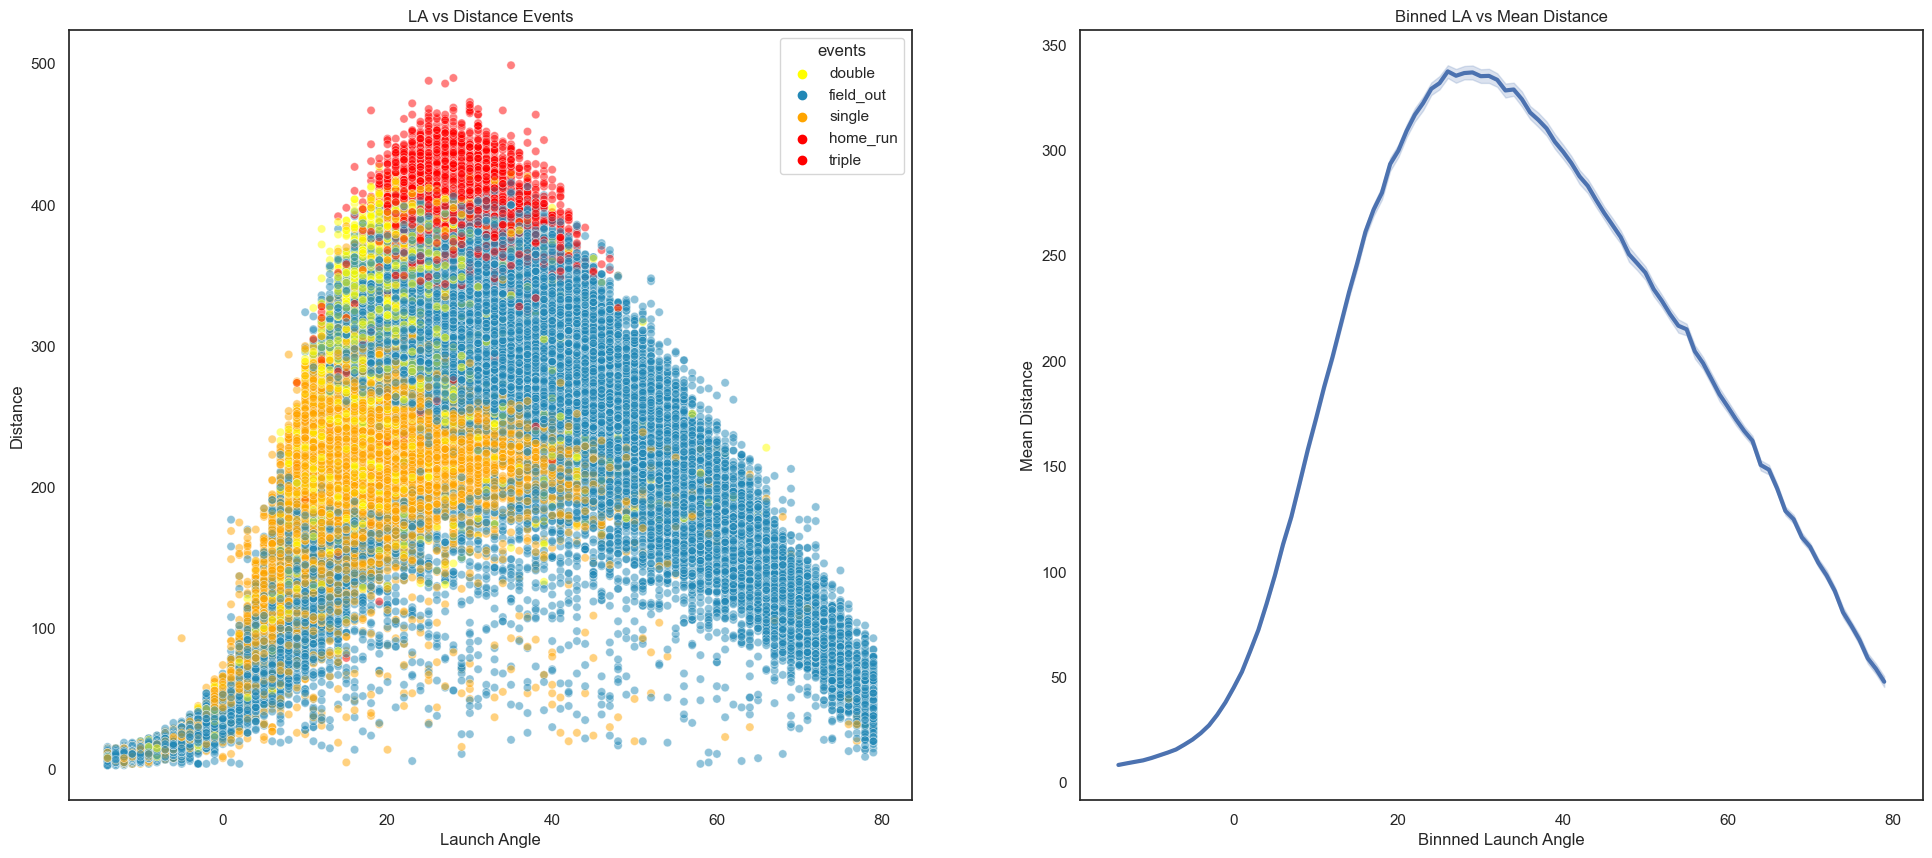

In [21]:
#----------- Relevant LAs ----------------------

data_limited_LA = data.loc[data['launch_angle'] < 80]
data_limited_LA = data_limited_LA.loc[data_limited_LA['launch_angle'] > -15]

#------------------- Graph --------------------------

plt.figure(figsize=(50,10))
sns.set_theme(style="white")

plt.subplot(142)
chart = sns.scatterplot(data = data_limited_LA, 
                x=data_limited_LA.launch_angle, 
                y=data_limited_LA.hit_distance_sc, 
                alpha = 0.5, 
                hue = data_limited_LA.events, palette=dict(home_run ='red',
                                                           triple= 'red', 
                                                           field_out = '#2288b6', 
                                                           single = 'orange',
                                                           double='yellow'))
chart.set(xlabel='Launch Angle')
chart.set(ylabel='Distance')
plt.title('LA vs Distance Events')

plt.subplot(143)
chart = sns.lineplot(data = data_limited_LA, 
             x=data_limited_LA.launch_angle, 
             y=data_limited_LA.hit_distance_sc,
             linewidth = 3)
chart.set(xlabel='Binnned Launch Angle')
chart.set(ylabel='Mean Distance')
plt.title('Binned LA vs Mean Distance')

plt.show()

# **Dynamic Pop Release Speed Rate**

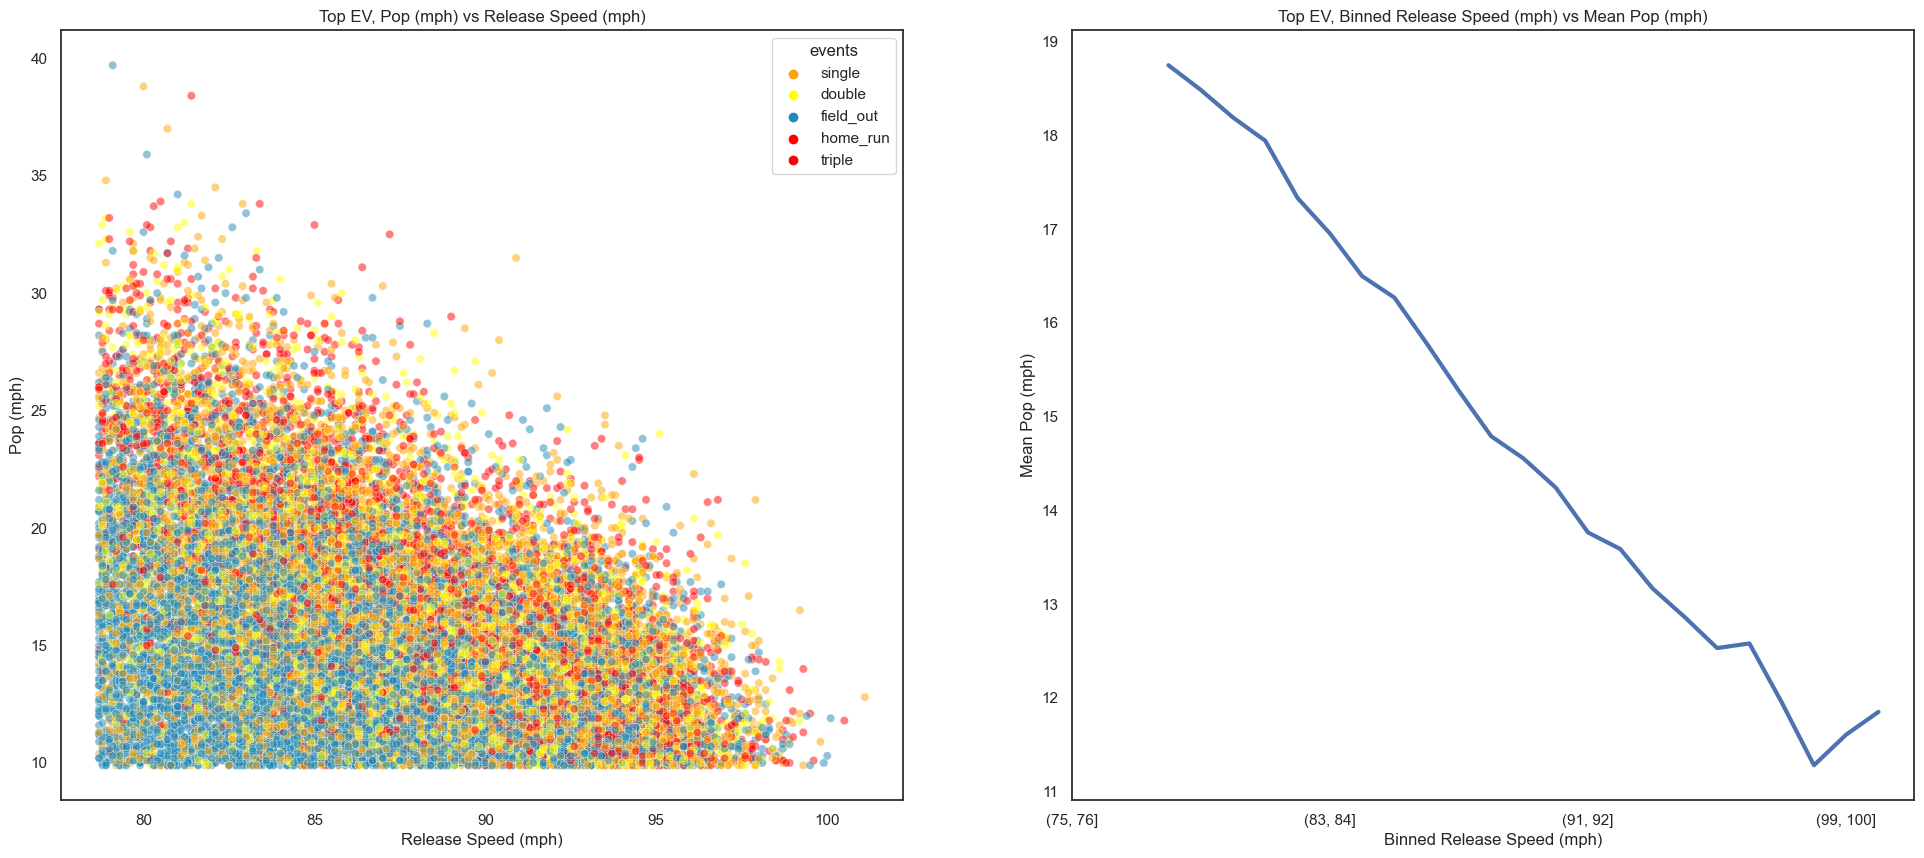

In [22]:
pd.set_option('mode.chained_assignment', None)

#------------------- Top Barrels + Excluding low pitch outliers --------------------------

Top_Pop = Top_95_launch_release_speed_percentile.loc[Top_95_launch_release_speed_percentile['Pop_percentile'] > 0.74]

#------------------- Binned Release Speed --------------------------

bins = []
for i in range(75, 102, 1):
    bins.append(i)

Top_Pop['release_speed_binned'] = pd.cut(Top_Pop['release_speed'], bins)

release_speed_binned_mean_Pop = Top_Pop.groupby('release_speed_binned')['Pop'].mean()
release_speed_binned_mean_Pop = pd.DataFrame(release_speed_binned_mean_Pop)
release_speed_binned_mean_Pop = release_speed_binned_mean_Pop.reset_index()

#------------------- Graph --------------------------

plt.figure(figsize=(50,10))
sns.set_theme(style="white")


plt.subplot(142)
chart = sns.scatterplot(data = Top_Pop, 
                        x=Top_Pop.release_speed, 
                        y=Top_Pop.Pop,  
                        hue = Top_Pop.events, 
                        alpha = 0.5, 
                        palette=dict(home_run ='red',
                                     triple= 'red', 
                                     field_out = '#2288b6', 
                                     single = 'orange',
                                     double='yellow'))
chart.set(xlabel='Release Speed (mph)')
chart.set(ylabel='Pop (mph)')
plt.title('Top EV, Pop (mph) vs Release Speed (mph)')

plt.subplot(143)
chart = sns.lineplot(data=release_speed_binned_mean_Pop, 
                     x=release_speed_binned_mean_Pop.release_speed_binned.astype(str), 
                     y=release_speed_binned_mean_Pop.Pop, 
                     linewidth = 3)
chart.set(xticks=[0,8,16,24])
chart.set(xlabel='Binned Release Speed (mph)')
chart.set(ylabel='Mean Pop (mph)')
plt.title('Top EV, Binned Release Speed (mph) vs Mean Pop (mph)')

plt.show()

# **Pop Spray**

In [23]:
#------------------- Top Pop + Excluding low pitch outliers + Righty Batters --------------------------

Top_Righty_Pops = Righty_batter_Top_95_launch_release_speed_percentile.loc[Righty_batter_Top_95_launch_release_speed_percentile['Pop_percentile'] > 0.74]

bins = np.linspace(10,40,6)

Top_Righty_Pops['Pop_binned'] = pd.cut(Top_Righty_Pops['Pop'], bins)

Top_Righty_Pops['Pop_binned'] = Top_Righty_Pops['Pop_binned'].astype(str)

woba_pop_binned = Top_Righty_Pops.groupby('Pop_binned')['woba_value'].mean()

woba_pop_binned = woba_pop_binned.to_dict()
Top_Righty_Pops['pop_binned_woba_mean'] = Top_Righty_Pops['Pop_binned'].map(woba_pop_binned)

In [24]:
Righty_batters_limited_spray = Righty_Top_25_launch_speed_percentile.loc[Righty_Top_25_launch_speed_percentile['spray_angle'] < 38]
Righty_batters_limited_spray = Righty_batters_limited_spray.loc[Righty_batters_limited_spray['spray_angle'] > -38]

bins = np.linspace(Righty_batters_limited_spray['spray_angle'].min(),Righty_batters_limited_spray['spray_angle'].max(),6)

Righty_batters_limited_spray['spray_angle_binned'] = pd.cut(Righty_batters_limited_spray['spray_angle'], bins)

Righty_batters_limited_spray['spray_angle_binned'] = Righty_batters_limited_spray['spray_angle_binned'].astype(str)

pull_woba = Righty_batters_limited_spray.groupby('spray_angle_binned')['Pop'].mean()

righty_spray_binned_woba = pull_woba.to_dict()

Righty_batters_limited_spray['spray_binned_pop_mean'] = Righty_batters_limited_spray['spray_angle_binned'].map(righty_spray_binned_woba)

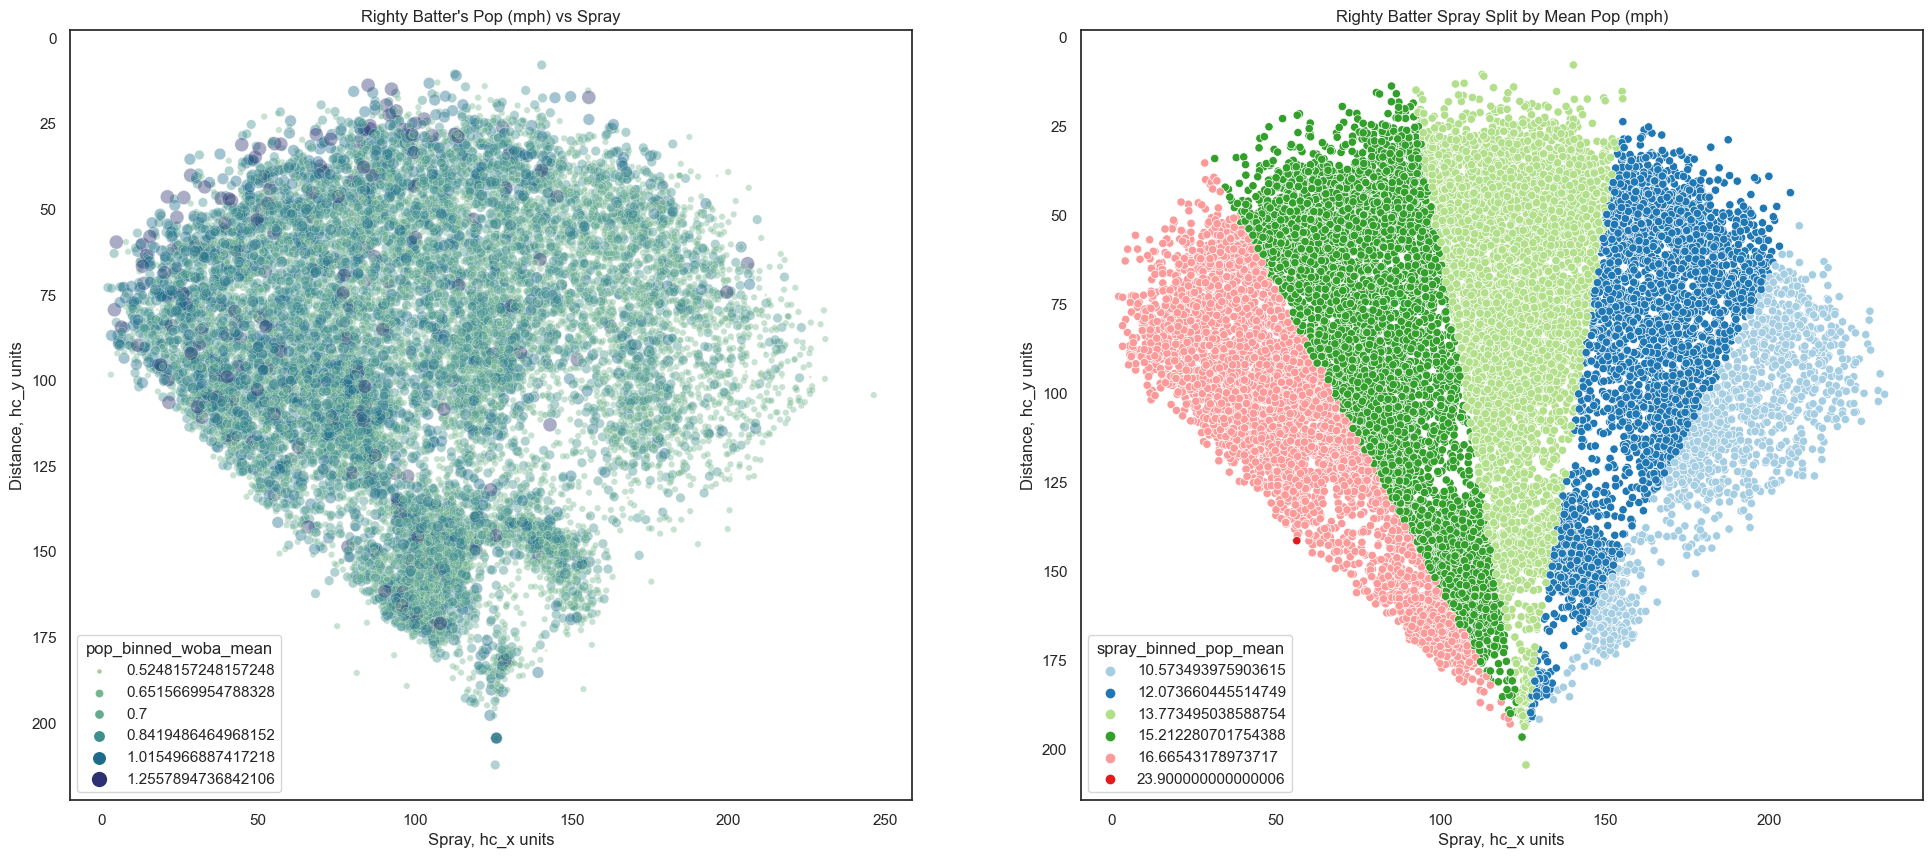

In [25]:
plt.figure(figsize=(50,10))
sns.set_theme(style="white")

plt.subplot(143)
ax = sns.scatterplot(data = Top_Righty_Pops, 
                     x=Top_Righty_Pops.hc_x, 
                     y=Top_Righty_Pops.hc_y, 
                     hue = Top_Righty_Pops.pop_binned_woba_mean, 
                     alpha = 0.4,
                     size=Top_Righty_Pops.pop_binned_woba_mean,
                     sizes=(5,100),
                     palette='crest')
ax.invert_yaxis()
ax.set(xlabel='Spray, hc_x units')
ax.set(ylabel='Distance, hc_y units')
plt.title("Righty Batter's Pop (mph) vs Spray")

plt.subplot(144)
ax = sns.scatterplot(data = Righty_batters_limited_spray, 
                     x=Righty_batters_limited_spray.hc_x, 
                     y=Righty_batters_limited_spray.hc_y, 
                     hue = Righty_batters_limited_spray.spray_binned_pop_mean, 
                     palette='Paired')
ax.invert_yaxis()
ax.set(xlabel='Spray, hc_x units')
ax.set(ylabel='Distance, hc_y units')
plt.title('Righty Batter Spray Split by Mean Pop (mph)')

plt.show()

# **Barrel Spray**

In [26]:
Righty_batters_limited_spray = Righty_data.loc[Righty_data['spray_angle'] < 38]
Righty_batters_limited_spray = Righty_batters_limited_spray.loc[Righty_batters_limited_spray['spray_angle'] > -38]

bins = np.linspace(Righty_batters_limited_spray['spray_angle'].min(),Righty_batters_limited_spray['spray_angle'].max(),6)

Righty_batters_limited_spray['spray_angle_binned'] = pd.cut(Righty_batters_limited_spray['spray_angle'], bins)

Righty_batters_limited_spray['spray_angle_binned'] = Righty_batters_limited_spray['spray_angle_binned'].astype(str)

pull_woba = Righty_batters_limited_spray.groupby('spray_angle_binned')['is_barrel'].count()

righty_spray_binned_woba = pull_woba.to_dict()

Righty_batters_limited_spray['spray_binned_bar_count'] = Righty_batters_limited_spray['spray_angle_binned'].map(righty_spray_binned_woba)

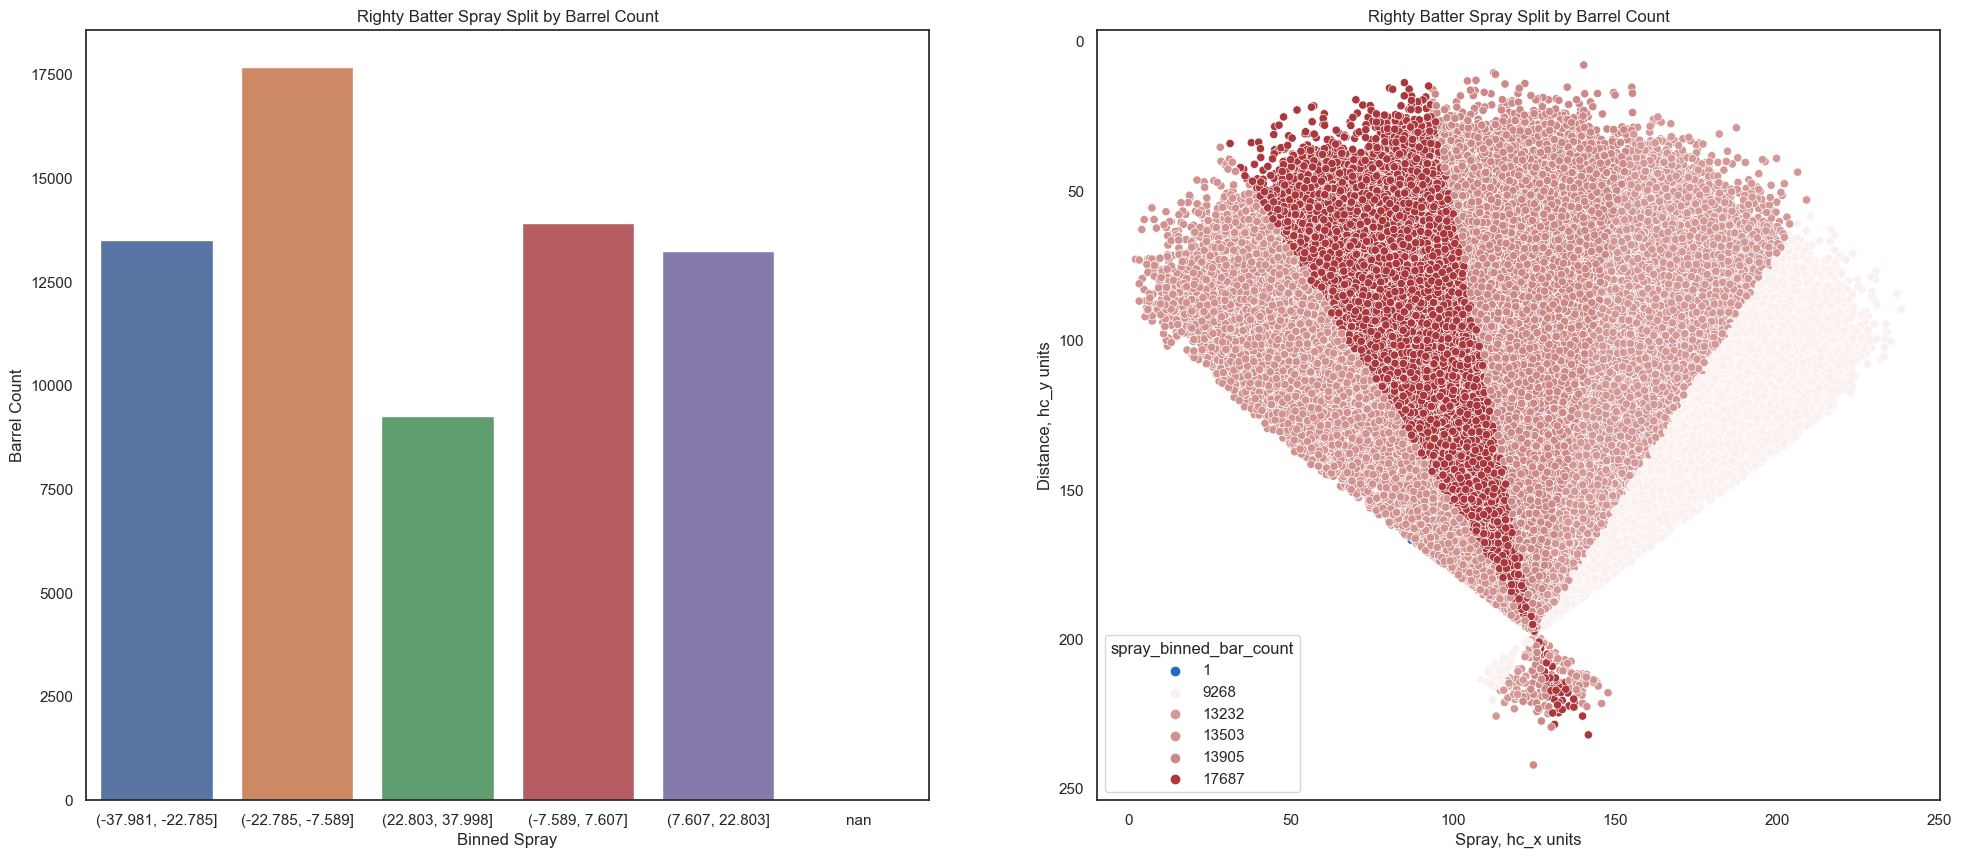

In [27]:
plt.figure(figsize=(50,10))
sns.set_theme(style="white")

plt.subplot(141)
chart = sns.barplot(data = Righty_batters_limited_spray, 
                        x=Righty_batters_limited_spray.spray_angle_binned, 
                        y=Righty_batters_limited_spray.spray_binned_bar_count)
chart.set(xlabel='Binned Spray')
chart.set(ylabel='Barrel Count')
plt.title('Righty Batter Spray Split by Barrel Count')

plt.subplot(142)
ax = sns.scatterplot(data = Righty_batters_limited_spray, 
                     x=Righty_batters_limited_spray.hc_x, 
                     y=Righty_batters_limited_spray.hc_y, 
                     hue = Righty_batters_limited_spray.spray_binned_bar_count,
                     palette='vlag')
ax.invert_yaxis()
ax.set(xlabel='Spray, hc_x units')
ax.set(ylabel='Distance, hc_y units')
plt.title('Righty Batter Spray Split by Barrel Count')

plt.show()

# **Sum HeatMap, LA vs Pull% for Distance, Woba, and Pop**

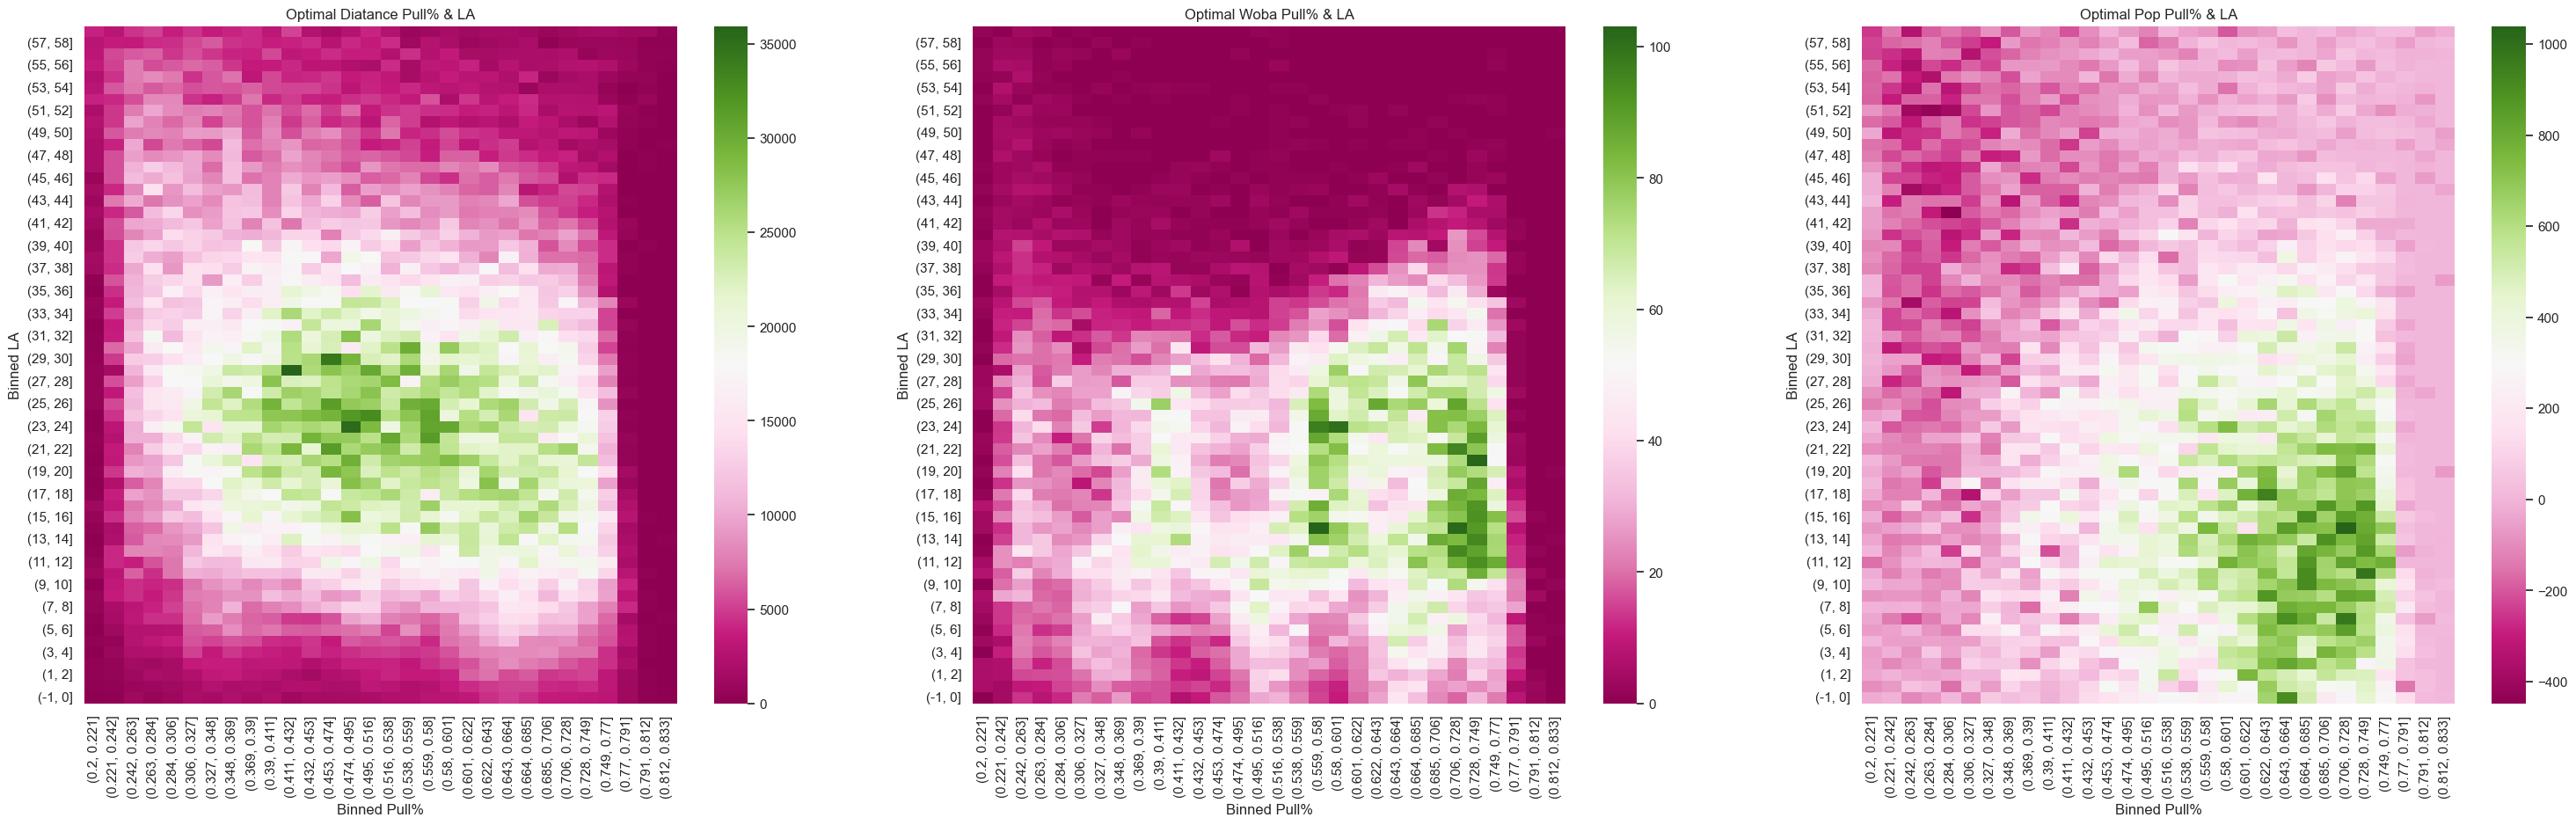

In [28]:
hitting_df = data

hitting_df_binned = hitting_df

#---------------LA--------------------

bins = []
for i in range(-1, 60, 1):
    bins.append(i)

hitting_df_binned['launch_angle_binned'] = pd.cut(hitting_df_binned['launch_angle'], bins)

#---------------Pull%-------------

bins = np.linspace(0.2,.833,31)

hitting_df_binned['pull_percent_binned'] = pd.cut(hitting_df['pull_percent'], bins)

non_coors_new_rel_terms_dis = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='pull_percent_binned', values='hit_distance_sc', aggfunc='sum')

non_coors_new_rel_terms_woba = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='pull_percent_binned', values='woba_value', aggfunc='sum')

non_coors_new_rel_terms_pop = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='pull_percent_binned', values='Pop', aggfunc='sum')

# ---------------Graph-------------

plt.figure(figsize=(50,10))
sns.set_theme(style="white")

plt.subplot(141)
ax = sns.heatmap(non_coors_new_rel_terms_dis,cmap="PiYG")
ax.invert_yaxis()
ax.set(xlabel='Binned Pull%')
ax.set(ylabel='Binned LA')
plt.title('Optimal Diatance Pull% & LA')

plt.subplot(142)
ax = sns.heatmap(non_coors_new_rel_terms_woba,cmap="PiYG")
ax.invert_yaxis()
ax.set(xlabel='Binned Pull%')
ax.set(ylabel='Binned LA')
plt.title('Optimal Woba Pull% & LA')

plt.subplot(143)
ax = sns.heatmap(non_coors_new_rel_terms_pop,cmap="PiYG")
ax.invert_yaxis()
ax.set(xlabel='Binned Pull%')
ax.set(ylabel='Binned LA')
plt.title('Optimal Pop Pull% & LA')

plt.show()

# **Mean HeatMap, LA vs Pull% for Distance, Woba, and Pop**

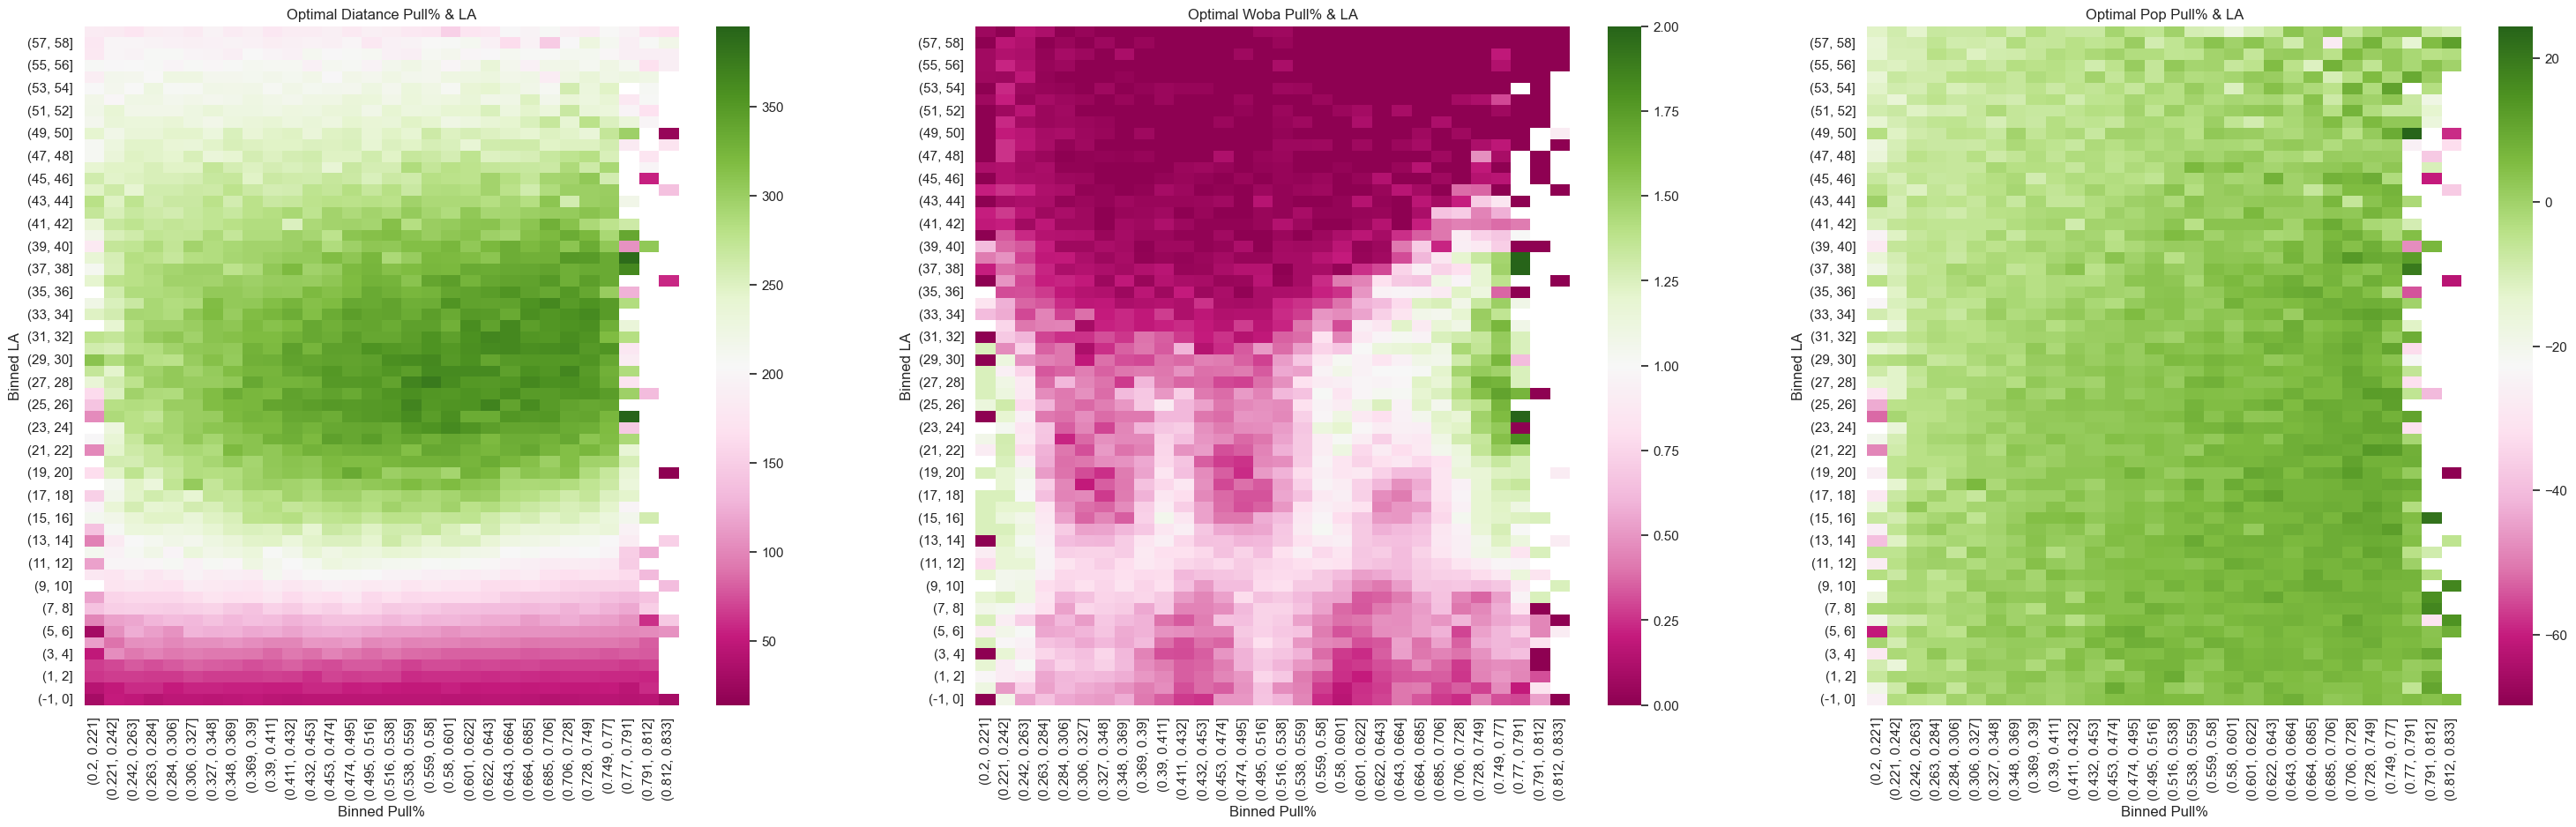

In [29]:
hitting_df = data

hitting_df_binned = hitting_df

#---------------LA--------------------

bins = []
for i in range(-1, 60, 1):
    bins.append(i)

hitting_df_binned['launch_angle_binned'] = pd.cut(hitting_df_binned['launch_angle'], bins)

#---------------Pull%-------------

bins = np.linspace(0.2,.833,31)

hitting_df_binned['pull_percent_binned'] = pd.cut(hitting_df['pull_percent'], bins)

non_coors_new_rel_terms_dis = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='pull_percent_binned', values='hit_distance_sc', aggfunc='mean')

non_coors_new_rel_terms_woba = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='pull_percent_binned', values='woba_value', aggfunc='mean')

non_coors_new_rel_terms_bar = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='pull_percent_binned', values='Pop', aggfunc='mean')

# ---------------Graph-------------

plt.figure(figsize=(50,10))
sns.set_theme(style="white")

plt.subplot(141)
ax = sns.heatmap(non_coors_new_rel_terms_dis,cmap="PiYG")
#add correct lables and axis titles---------------------------------------------------------
ax.invert_yaxis()
ax.set(xlabel='Binned Pull%')
ax.set(ylabel='Binned LA')
plt.title('Optimal Diatance Pull% & LA')

plt.subplot(142)
ax = sns.heatmap(non_coors_new_rel_terms_woba,cmap="PiYG")
ax.invert_yaxis()
ax.set(xlabel='Binned Pull%')
ax.set(ylabel='Binned LA')
plt.title('Optimal Woba Pull% & LA')

plt.subplot(143)
ax = sns.heatmap(non_coors_new_rel_terms_bar,cmap="PiYG")
ax.invert_yaxis()
ax.set(xlabel='Binned Pull%')
ax.set(ylabel='Binned LA')
plt.title('Optimal Pop Pull% & LA')

plt.show()

# **Future Analysis**

- Encorporate new features into models
- Simple Impute
- Refactor